<a target="_blank" href="https://colab.research.google.com/github/olsenlabmit/Polymer-Ensemble-Similarity/blob/main/notebooks/Example3_Nonlinear_Star_Polymer_Ensemble_Colab.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
# @title Copyright & License (click to expand)

# MIT License

# Copyright (c) 2023 olsenlabmit

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

# Download Necessary Files

Downloading local python functions, tables, and dataset
from Github Repo [Polymer-Ensemble-Similarity](https://github.com/olsenlabmit/Polymer-Ensemble-Similarity.git)

In [ ]:
!git clone https://github.com/olsenlabmit/Polymer-Ensemble-Similarity.git
!mv Polymer-Ensemble-Similarity/dataset .
!mv Polymer-Ensemble-Similarity/tables .
!mv Polymer-Ensemble-Similarity/utils .

# Import Required Libraries

In [ ]:
import random
import numpy as np
import shutil
import sys
import os.path
import json
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns


if not shutil.which("rdkit"):
    !pip install -q rdkit

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

if not shutil.which("grakel"):
    !pip install grakel

if not shutil.which("dgl"):
    !pip install dgl

if not shutil.which("umap"):
    !pip install umap-learn

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert shutil.which("pyomo")

from pyomo.environ import *

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc
        except:
            pass

assert shutil.which("cbc") or os.path.isfile("cbc")

from utils.load_networkx import networkx_feat
from utils import macro_unsupervised as unsup
from utils import plot

print("Import Required Libraries Done!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82807 sha256=6b1e9b04d618ecf5acf0be402ff1bba49f41a1aa5ebf10e193bbefb3e5fb11d3
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=0ac8b32889ec8489b0bcd9f020030d1149ca0a73a3a752d9392c9d58ae6636f2
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be9

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
Import Required Libraries Done!


# Load the Nonlinear Star Polymer Ensemble in Example3


<img src="https://drive.google.com/uc?export=view&id=1c4LlIZcPkOjPsRm5xxxGfOIId1fsozy9"  width="50%">

<img src="https://drive.google.com/uc?export=view&id=1xQbejq7rwD2InsdREVUPZ8JM7wQF-AIo"  width="50%">





**Variables**:

networkx_feat: the function for loading the graph representations of each type polymer chain in one polymer ensemble.

TXT_DATA_PATH: the path for ensemble dataset where each polymer chain graph representation is stored as a txt file.

MON_SMILES: the text file for repeat units

FEAT: Type of features for polymer chain repeat units -- one-hot encoding ('onehot') or fingerprints ('fp')

To understand how to generate the txt files for polymer chains, please check the dataset [README.md](https://github.com/olsenlabmit/Polymer-Ensemble-Similarity/blob/main/dataset/README.md).

## Load Graph Representations and Weights in Ensemble SP-1

Ensemble SP-1 has the following ten types of polymer molecules.

<img src="https://drive.google.com/uc?export=view&id=1GZHb4TjRE9YUmfXKUk8cw8SvjFvK7fei"  width="50%">

In [ ]:
Ensemble_SP1 = networkx_feat(
    TXT_DATA_PATH="./dataset/Example3/SP1/",
    MON_SMILES="./tables/SMILES_repeatunit.txt",
    FEAT="fp",
)

Ensemble_SP1

{'ID1': <networkx.classes.graph.Graph at 0x7d654e367cd0>,
 'ID10': <networkx.classes.graph.Graph at 0x7d654e364550>,
 'ID2': <networkx.classes.graph.Graph at 0x7d654f240b80>,
 'ID3': <networkx.classes.graph.Graph at 0x7d654e3136d0>,
 'ID4': <networkx.classes.graph.Graph at 0x7d654e365450>,
 'ID5': <networkx.classes.graph.Graph at 0x7d654e3654b0>,
 'ID6': <networkx.classes.graph.Graph at 0x7d654e367d30>,
 'ID7': <networkx.classes.graph.Graph at 0x7d654e367ee0>,
 'ID8': <networkx.classes.graph.Graph at 0x7d654e365720>,
 'ID9': <networkx.classes.graph.Graph at 0x7d654e3136a0>}

In [ ]:
with open("./dataset/Example3/SP1_weight_analytic.json", "r") as json_file:
    Ensemble_SP1_weight = json.load(json_file)

Ensemble_SP1_weight

{'ID1': 0.015625,
 'ID2': 0.09375,
 'ID3': 0.046875,
 'ID4': 0.1875,
 'ID5': 0.1875,
 'ID6': 0.046875,
 'ID7': 0.125,
 'ID8': 0.1875,
 'ID9': 0.09375,
 'ID10': 0.015625}

## Graph Representation Index Sort Function

These graph representations are stored in dict format, which is a python dictionary. The dictionary does not have order. Therefore, we need to have some sort functions to call them in order according their labels (keys).


In [ ]:
# "ID1", "ID2", "ID3", "ID4", ......
# These graph representation labels (keys) are alphabet "ID", and one binary number.
# The alphabet is constant, and the binary number is varying.
# Therefore, we use the binary number for sort function.
# The sort function depends on how the graph labels are created.
def sortFunc(index):
    return int(index[2:])

## Visualize Graph Representations in Ensemble SP-1



ID1: 


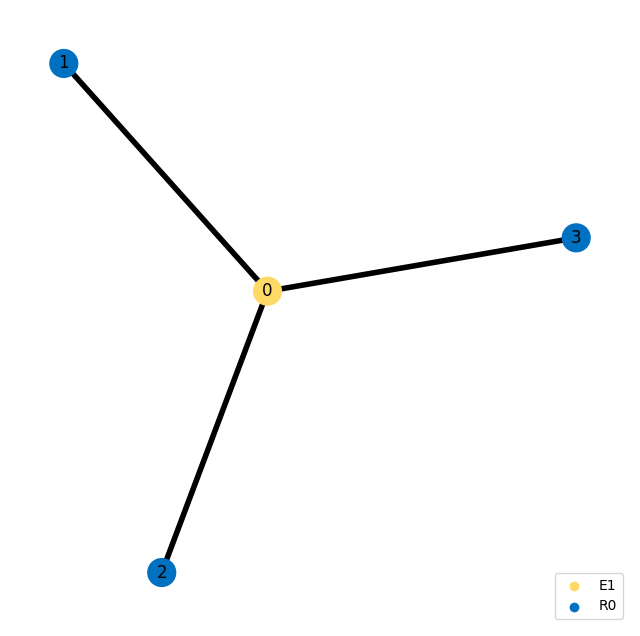

{0: 'E1', 1: 'R0', 2: 'R0', 3: 'R0'}




ID2: 


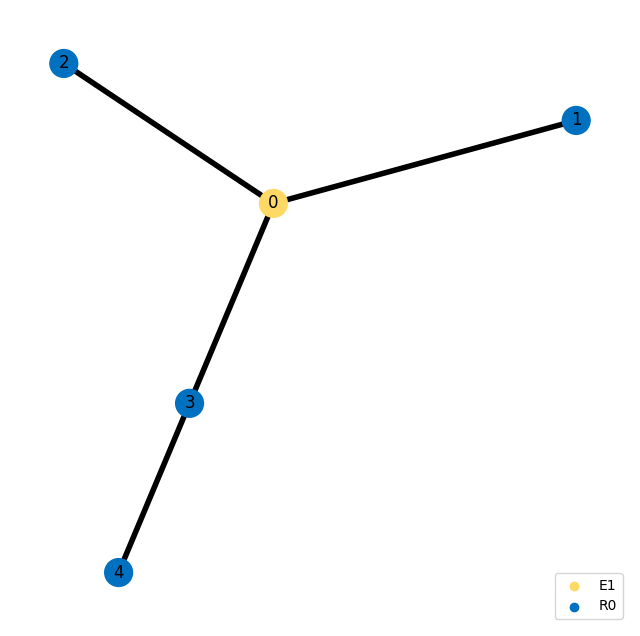

{0: 'E1', 1: 'R0', 2: 'R0', 3: 'R0', 4: 'R0'}




ID3: 


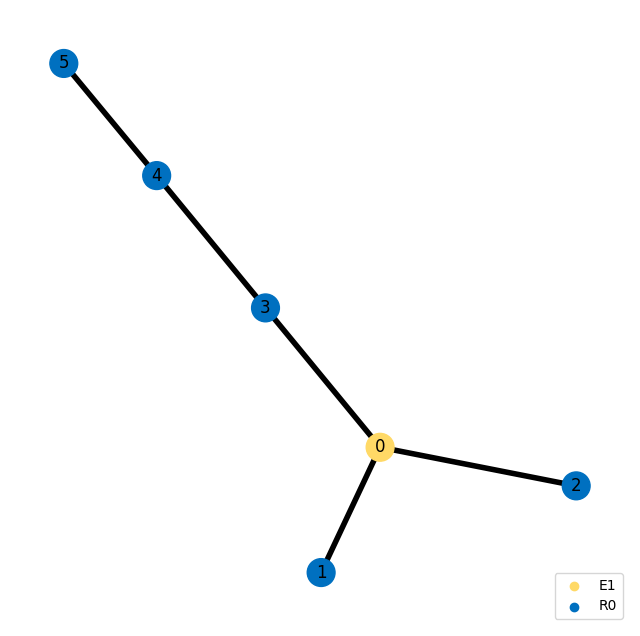

{0: 'E1', 1: 'R0', 2: 'R0', 3: 'R0', 4: 'R0', 5: 'R0'}




ID4: 


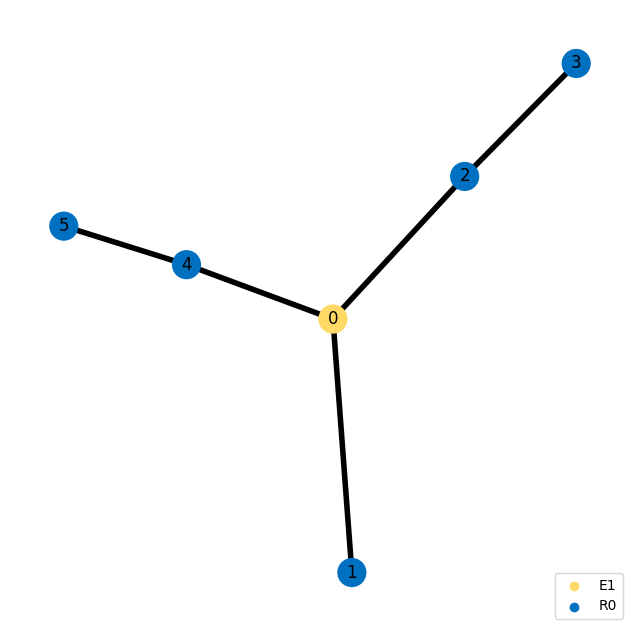

{0: 'E1', 1: 'R0', 2: 'R0', 3: 'R0', 4: 'R0', 5: 'R0'}




ID5: 


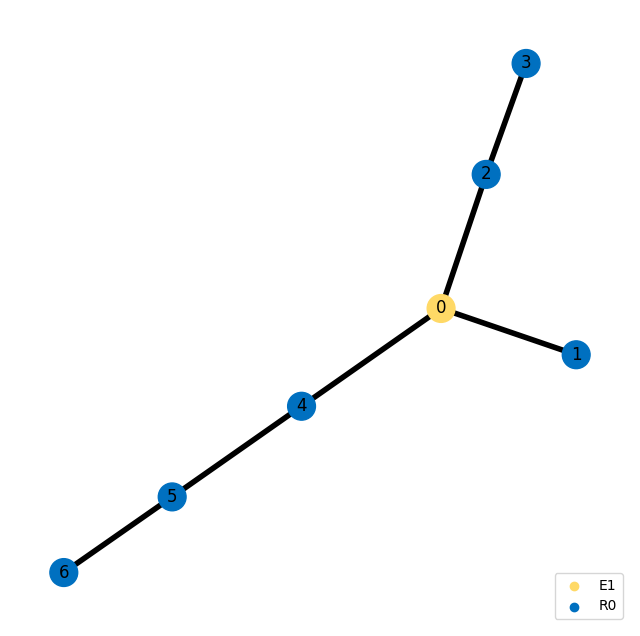

{0: 'E1', 1: 'R0', 2: 'R0', 3: 'R0', 4: 'R0', 5: 'R0', 6: 'R0'}




ID6: 


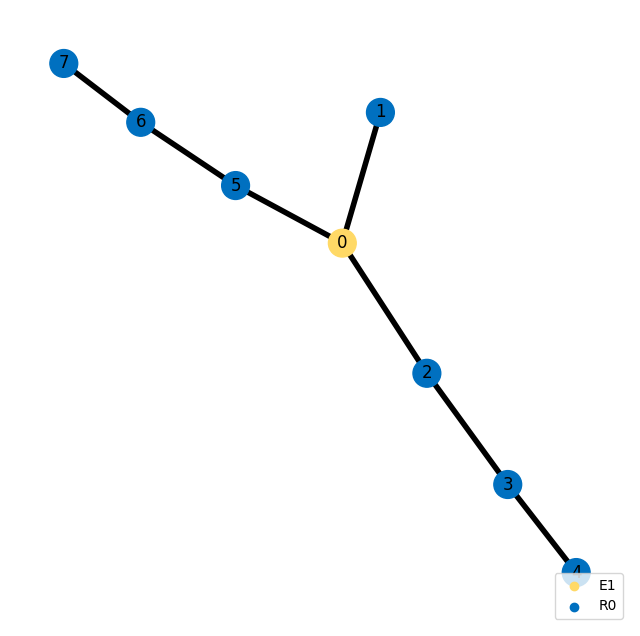

{0: 'E1', 1: 'R0', 2: 'R0', 3: 'R0', 4: 'R0', 5: 'R0', 6: 'R0', 7: 'R0'}




ID7: 


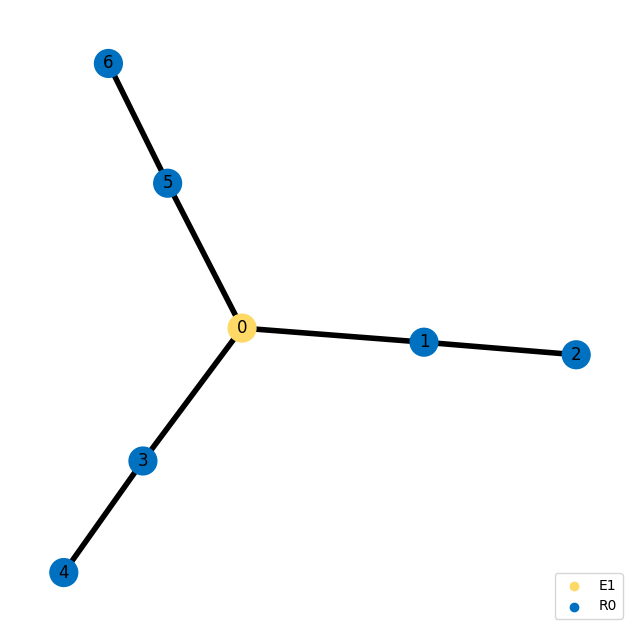

{0: 'E1', 1: 'R0', 2: 'R0', 3: 'R0', 4: 'R0', 5: 'R0', 6: 'R0'}




ID8: 


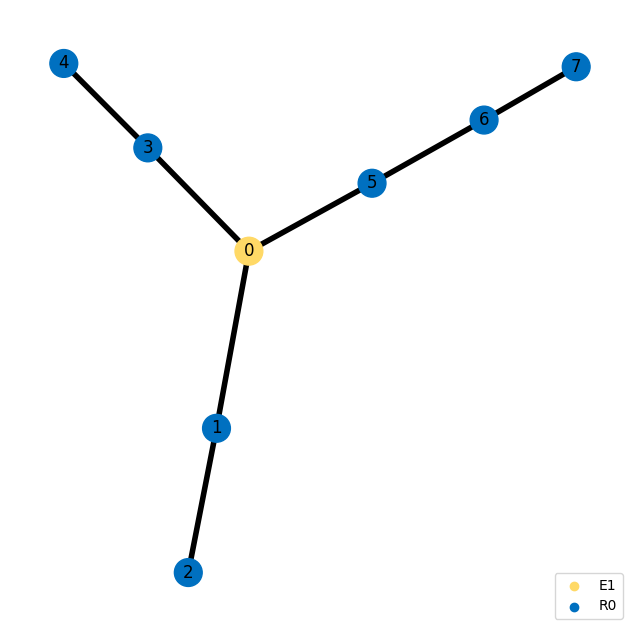

{0: 'E1', 1: 'R0', 2: 'R0', 3: 'R0', 4: 'R0', 5: 'R0', 6: 'R0', 7: 'R0'}




ID9: 


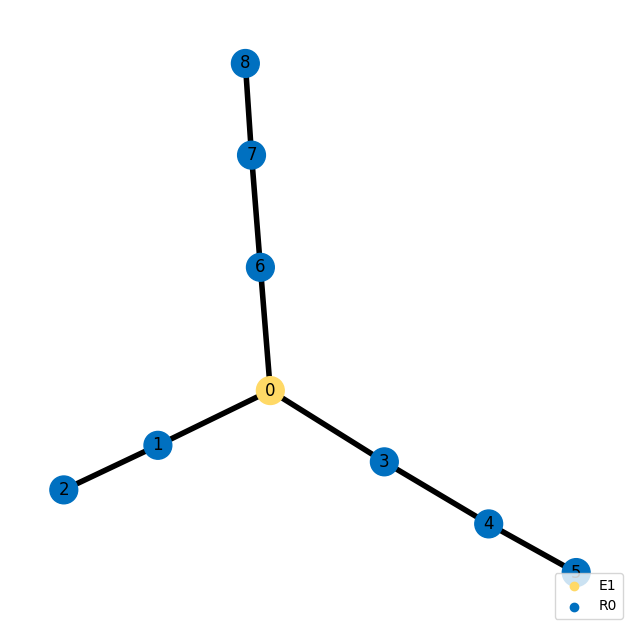

{0: 'E1', 1: 'R0', 2: 'R0', 3: 'R0', 4: 'R0', 5: 'R0', 6: 'R0', 7: 'R0', 8: 'R0'}




ID10: 


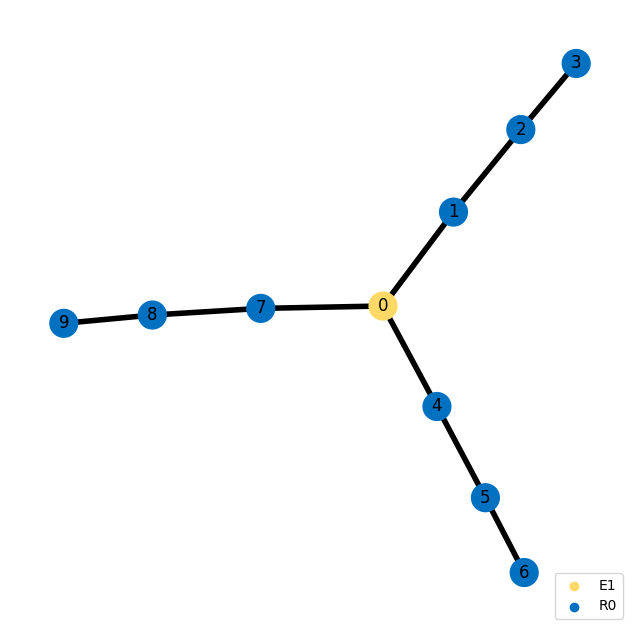

{0: 'E1', 1: 'R0', 2: 'R0', 3: 'R0', 4: 'R0', 5: 'R0', 6: 'R0', 7: 'R0', 8: 'R0', 9: 'R0'}






In [ ]:
Ensemble_SP1_indexs = list(Ensemble_SP1.keys())
Ensemble_SP1_indexs.sort(key=sortFunc)

for i in range(0, len(Ensemble_SP1_indexs)):
    print(Ensemble_SP1_indexs[i] + ": ")
    plot.graph(Ensemble_SP1[Ensemble_SP1_indexs[i]])
    print("\n")
    print("\n")

## Load Graph Representations and Weights in Ensemble SP-2

In [ ]:
Ensemble_SP2 = networkx_feat(
    TXT_DATA_PATH="./dataset/Example3/SP2/",
    MON_SMILES="./tables/SMILES_repeatunit.txt",
    FEAT="fp",
)

with open("./dataset/Example3/SP2_weight_analytic.json", "r") as json_file:
    Ensemble_SP2_weight = json.load(json_file)

## Load Graph Representations and Weights in Ensemble SP-3

In [ ]:
Ensemble_SP3 = networkx_feat(
    TXT_DATA_PATH="./dataset/Example3/SP3/",
    MON_SMILES="./tables/SMILES_repeatunit.txt",
)

with open("./dataset/Example3/SP3_weight_analytic.json", "r") as json_file:
    Ensemble_SP3_weight = json.load(json_file)

## Load Graph Representations and Weights in Ensemble SP-4

In [ ]:
Ensemble_SP4 = networkx_feat(
    TXT_DATA_PATH="./dataset/Example3/SP4/",
    MON_SMILES="./tables/SMILES_repeatunit.txt",
    FEAT="fp",
)

with open("./dataset/Example3/SP4_weight_analytic.json", "r") as json_file:
    Ensemble_SP4_weight = json.load(json_file)

## Load Graph Representations and Weights in Ensemble SP-5

In [ ]:
Ensemble_SP5 = networkx_feat(
    TXT_DATA_PATH="./dataset/Example3/SP5/",
    MON_SMILES="./tables/SMILES_repeatunit.txt",
    FEAT="fp",
)

with open("./dataset/Example3/SP5_weight_analytic.json", "r") as json_file:
    Ensemble_SP5_weight = json.load(json_file)

## Load Graph Representations and Weights in Ensemble SP-6

In [ ]:
Ensemble_SP6 = networkx_feat(
    TXT_DATA_PATH="./dataset/Example3/SP6/",
    MON_SMILES="./tables/SMILES_repeatunit.txt",
    FEAT="fp",
)

with open("./dataset/Example3/SP6_weight_analytic.json", "r") as json_file:
    Ensemble_SP6_weight = json.load(json_file)

## Load Graph Representations and Weights in Ensemble SP-7

In [ ]:
Ensemble_SP7 = networkx_feat(
    TXT_DATA_PATH="./dataset/Example3/SP7/",
    MON_SMILES="./tables/SMILES_repeatunit.txt",
    FEAT="fp",
)

with open("./dataset/Example3/SP7_weight_analytic.json", "r") as json_file:
    Ensemble_SP7_weight = json.load(json_file)

## Load Graph Representations and Weights in Ensemble SP-8

In [ ]:
Ensemble_SP8 = networkx_feat(
    TXT_DATA_PATH="./dataset/Example3/SP8/",
    MON_SMILES="./tables/SMILES_repeatunit.txt",
    FEAT="fp",
)

with open("./dataset/Example3/SP8_weight_analytic.json", "r") as json_file:
    Ensemble_SP8_weight = json.load(json_file)

# Polymer Ensembles Similarity Function via Earth Mover's Distance

Use the earth mover's distance (EMD) to compute pairwise similarity scores between polymer ensembles.


$ EMD (P,Q)= \min_{F}\sum_{i=1}^{m}\sum_{j=1}^{n}f_{i,j}d_{i,j}$

$ {\rm subject\ to\ } f_{i,j} \geq 0, {\rm\ for\ any\ } \ 1 \leq i \leq m, 1 \leq j \leq n $

$     \sum_{j=1}^{n}f_{i,j} =w_{pi}, {\rm for\ any} \ 1 \leq i \leq m $

$     \sum_{i=1}^{m}f_{i,j} =w_{qj}, {\rm for\ any} \ 1 \leq j \leq n $

$     \sum_{i=1}^{m}\sum_{j=1}^{n}f_{i,j} = \sum_{i}^{m} w_{pi} = \sum_{j}^{n} w_{qj} = 1 $


One polymer ensemble is defined as $P = \{(p_1,w_{p_1}) ,(p_2,w_{p_2}),...,(p_i,w_{p_i}),...,(p_m,w_{p_m})\}$ has $m$ types of polymer chains, where $p_i$ represents a type of polymer chain and  $w_{p_i}>0$ is its corresponding weight, which can be the mole fraction of this polymer chain in the polymer ensemble. Similarly, the second ensemble $Q = {(q_1,w_{q_1}),(q_2,w_{q_2}),...,(q_j,w_{q_j}),...,(q_n,w_{q_n})}$ has $n$ types of polymer chains. The sums of the weights for $P$ and $Q$ are both normalized and equal to one.

The EMD linear optimization code  refers to [Transportation Networks, ND Pyomo Notebook](https://jckantor.github.io/ND-Pyomo-Cookbook/notebooks/03.01-Transportation-Networks.html)

Once $EMD (P,Q)$ is calculated, the similarity score between $P$ and $Q$ is

$S(P,Q) = 1- EMD (P,Q)$


The distance ($d_{i,j}$) between one polymer molecule $p_i$ and another polymer molecule $q_j$ is calculated through graph edit distance. This part of the code builds on [GLAMOUR](https://github.com/learningmatter-mit/GLAMOUR) and networkx function [graph_edit_distance](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.similarity.graph_edit_distance.html).

$d(g_1, g_2) = 1- \exp(-\frac{\alpha \cdot GED(g_1, g_2)}{(N_1 + N_2)/2})$

where $g_i$ is the graph representation of one polymer molecule, $N_i$ is the number of nodes in graph $g_i$, $\alpha$ is a tunable parameter with the default value being 1. [Reference1](https://arxiv.org/abs/1808.05689), [Reference2](https://doi.org/10.1021/acs.macromol.3c00761)

In [ ]:
def Similarity_Score_EMD_Calculation(
    ensembleP=None,
    ensembleP_weight=None,
    ensembleQ=None,
    ensembleQ_weight=None,
    alpha=1,
    print_details=False,
):
    # Data loading w_i, w_j, d_ij

    ## load the weight w_i of Ensemble P
    Demand = {}

    ensembleP_number = len(ensembleP_weight)

    ensembleP_weight_sum = sum(ensembleP_weight.values())

    ensembleP_indexs = list(ensembleP.keys())
    ensembleP_indexs.sort(key=sortFunc)

    for i in range(0, ensembleP_number):
        Demand["p" + str(i + 1)] = (
            ensembleP_weight[ensembleP_indexs[i]] / ensembleP_weight_sum
        )

    ## load the weight w_j of Ensemble Q
    Supply = {}

    ensembleQ_number = len(ensembleQ_weight)

    ensembleQ_weight_sum = sum(ensembleQ_weight.values())

    ensembleQ_indexs = list(ensembleQ.keys())
    ensembleQ_indexs.sort(key=sortFunc)

    for j in range(0, ensembleQ_number):
        Supply["q" + str(j + 1)] = (
            ensembleQ_weight[ensembleQ_indexs[j]] / ensembleQ_weight_sum
        )

    ## load the distance matrix D = [d_ij]
    D = {}
    for i in range(0, ensembleP_number):
        for j in range(0, ensembleQ_number):
            ### calculate the GED between two graph representations
            GED = unsup.edit_distance(
                ensembleP[ensembleP_indexs[i]],
                ensembleQ[ensembleQ_indexs[j]],
                node_attr="h",
                indel_mul=1,
                sub_mul=1,
            )

            ### calculate the number of nodes in graph N_i
            N_i = ensembleP[ensembleP_indexs[i]].number_of_nodes()

            ### calculate the number of nodes in graph N_j
            N_j = ensembleQ[ensembleQ_indexs[j]].number_of_nodes()

            D[("p" + str(i + 1), "q" + str(j + 1))] = 1 - np.exp(
                -alpha * GED / (0.5 * (N_i + N_j))
            )

    # The following are optimization steps
    ## Step 0: Create an instance of the model
    model = ConcreteModel()
    model.dual = Suffix(direction=Suffix.IMPORT)

    ## Step 1: Define index sets
    CUS = list(Demand.keys())
    SRC = list(Supply.keys())

    ## Step 2: Define the decision
    model.x = Var(CUS, SRC, domain=NonNegativeReals)

    ## Step 3: Define the objective
    model.Cost = Objective(
        expr=sum([D[c, s] * model.x[c, s] for c in CUS for s in SRC]), sense=minimize
    )

    ## Step 4: Add constraints
    model.src = ConstraintList()
    for s in SRC:
        model.src.add(sum([model.x[c, s] for c in CUS]) <= Supply[s])

    model.dmd = ConstraintList()
    for c in CUS:
        model.dmd.add(sum([model.x[c, s] for s in SRC]) == Demand[c])

    ## Step 5: Call the cbc solver to solve this EMD problem
    results = SolverFactory("cbc").solve(model)

    ## Step 6: Return EMD result
    if "ok" == str(results.Solver.status):
        if print_details == True:
            for s in SRC:
                for c in CUS:
                    if model.x[c, s]() > 0:
                        print(
                            "Ship from ",
                            s,
                            " to ",
                            c,
                            ":",
                            model.x[c, s](),
                            "*",
                            D[c, s],
                        )
        return 1 - model.Cost()

    else:
        print("No Valid Solution Found")
        return False

# Calculation of $S({\rm SP-1,SP-2})$

In [ ]:
Similarity_Score = Similarity_Score_EMD_Calculation(
    ensembleP=Ensemble_SP1,
    ensembleP_weight=Ensemble_SP1_weight,
    ensembleQ=Ensemble_SP2,
    ensembleQ_weight=Ensemble_SP2_weight,
    alpha=1,
    print_details=False,
)

In [ ]:
print("Similarity Score between SP-1 and SP-2 = %.2f" % Similarity_Score)

Similarity Score between SP-1 and SP-2 = 0.57


# Calculation of All the Pairwise S

This step will take a long time. If users do not have the time to run the code to calculate all the pairwise S but still want to see the results, users can directly skip this following step and can load the results that are stored. If the users want to run the code to calculate all the pairwise S, uncomment the following code.

In [ ]:
# Users can uncomment the following to calculate all the pairwise
# similarity scores between polymer ensembles.
# This step will take a long time.


# Example3_Ensembles = [
#    Ensemble_SP1,
#    Ensemble_SP2,
#    Ensemble_SP3,
#    Ensemble_SP4,
#    Ensemble_SP5,
#    Ensemble_SP6,
#    Ensemble_SP7,
#    Ensemble_SP8,]

# Example3_Ensembles_weights =  [
#    Ensemble_SP1_weight,
#    Ensemble_SP2_weight,
#    Ensemble_SP3_weight,
#    Ensemble_SP4_weight,
#    Ensemble_SP5_weight,
#    Ensemble_SP6_weight,
#    Ensemble_SP7_weight,
#    Ensemble_SP8_weight,]

# Example3_Ensembles_names = [
#    "SP-1",
#    "SP-2",
#    "SP-3",
#    "SP-4",
#    "SP-5",
#    "SP-6",
#    "SP-7",
#    "SP-8"]

# S_Matrix = np.ones([8,8])

# for i in range(0,7):

#    for j in range(i+1,8):
#
#        S_ij = Similarity_Score_EMD_Calculation(
#                        ensembleP=Example3_Ensembles[i],
#                        ensembleP_weight=Example3_Ensembles_weights[i],
#                        ensembleQ=Example3_Ensembles[j],
#                        ensembleQ_weight=Example3_Ensembles_weights[j],
#                        alpha=1,
#                        print_details=False,
#                      )
#
#        print(f"S({Example3_Ensembles_names[i]},{Example3_Ensembles_names[j]})=",
#              S_ij)
#        print('\n')
#
#        S_Matrix[i,j] = S_ij

#        S_Matrix[j,i] = S_ij

## Load the  Stored Results of Similarity Matrix

Similarity Matrix have been calculated and the results were stored.

Users can directly load the Similarity Matrix if users want to see the results but do not have time to run the previous step.

In [27]:
S_Matrix = np.load("./dataset/Example3/Example3_Similarity_Matrix.npy")

# Visualize Similarity Matrix

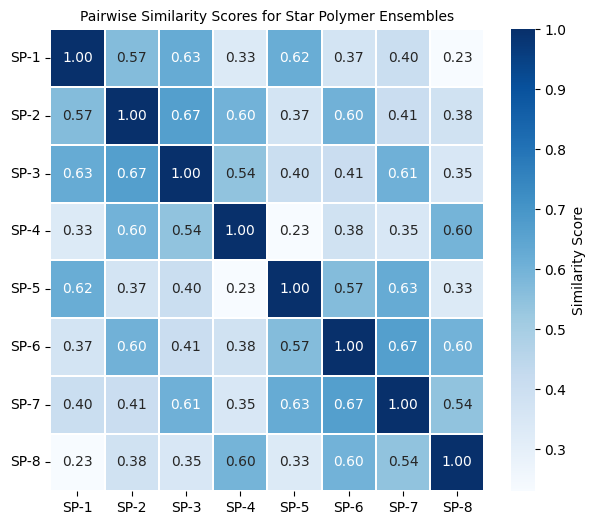

In [28]:
fig, ax = plt.subplots(figsize=(7, 6), sharey=True)

x_labels = [
    "SP-1",
    "SP-2",
    "SP-3",
    "SP-4",
    "SP-5",
    "SP-6",
    "SP-7",
    "SP-8",
]
y_labels = [
    "SP-1",
    "SP-2",
    "SP-3",
    "SP-4",
    "SP-5",
    "SP-6",
    "SP-7",
    "SP-8",
]

sns.heatmap(
    S_Matrix,
    linewidth=0.3,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    cbar_kws={"label": "Similarity Score"},
)

ax.set_title(r"Pairwise Similarity Scores for Star Polymer Ensembles", fontsize=10)

ax.set_xticklabels(x_labels, rotation=0, fontsize=10, horizontalalignment="center")

ax.set_yticklabels(y_labels, rotation=360, fontsize=10, horizontalalignment="right")

plt.show()